In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Number of train samples: 47149
Number of valid samples: 3039
Total number of samples: 50188


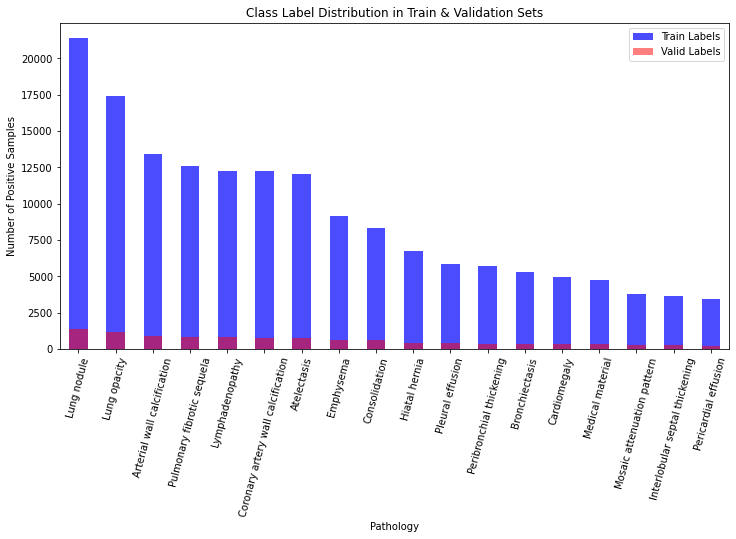

In [20]:
base_path = "/scratch/project_465001111/ct_clip/labels"
train_path = os.path.join(base_path, "train_labels.csv")
valid_path = os.path.join(base_path, "valid_labels.csv")

train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)

print(f"Number of train samples: {train_df.shape[0]}")
print(f"Number of valid samples: {valid_df.shape[0]}")
print(f"Total number of samples: {train_df.shape[0] + valid_df.shape[0]}")

train_label_counts = train_df.iloc[:, 1:].sum()
valid_label_counts = valid_df.iloc[:, 1:].sum()

plt.figure(figsize=(12,6))
train_label_counts.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.7, label="Train Labels")
valid_label_counts.sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.5, label="Valid Labels")
plt.title("Class Label Distribution in Train & Validation Sets")
plt.xlabel("Pathology")
plt.ylabel("Number of Positive Samples")
plt.xticks(rotation=75)
plt.legend()
plt.show()

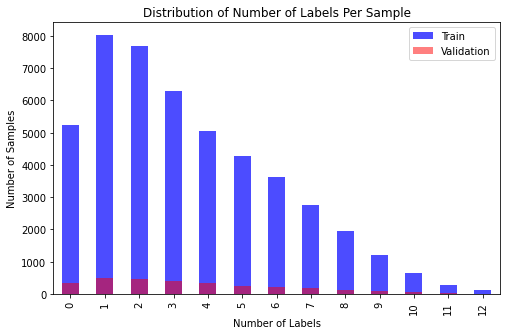

In [21]:
train_df["num_labels"] = train_df.iloc[:, 1:].sum(axis=1)
valid_df["num_labels"] = valid_df.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(8,5))
train_df["num_labels"].value_counts().sort_index().plot(kind="bar", color="blue", alpha=0.7, label="Train")
valid_df["num_labels"].value_counts().sort_index().plot(kind="bar", color="red", alpha=0.5, label="Validation")
plt.title("Distribution of Number of Labels Per Sample")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Samples")
plt.legend()
plt.show()